In [4]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_customers = 500

data = {
    'customer_id': range(1, n_customers + 1),
    'age': np.random.randint(18, 70, n_customers),
    'spending_score': np.random.randint(1, 100, n_customers)
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("customer_data.csv", index=False)

print("customer_data.csv created successfully")
print(df.head())


customer_data.csv created successfully
   customer_id  age  spending_score
0            1   56              16
1            2   69              61
2            3   46              64
3            4   32              63
4            5   60              69


In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("customer_data.csv")


X = df[['age', 'spending_score']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)


centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)


cluster_names = {}

for i, c in enumerate(centroids_original):
    age, spending_score = c

    if age <= 31 and spending_score < 50:
        cluster_names[i] = "Young Low Income"
    elif age <= 31 and spending_score >= 50:
        cluster_names[i] = "Young High Income"
    elif age >= 30 and spending_score < 50:
        cluster_names[i] = "Old Low Income"
    elif age >= 30 and spending_score >= 50:
        cluster_names[i] = "Old High Income"

df['cluster_name'] = df['cluster'].map(cluster_names)


print(df.head())
print("\nCluster counts:")
print(df['cluster'].value_counts())

new_customer = [[9, 20]]
new_customer_scaled = scaler.transform(new_customer)
pred_cluster = kmeans.predict(new_customer_scaled)

print("\nPredicted Cluster:", pred_cluster[0])
print("Cluster Name:", cluster_names[pred_cluster[0]])


   customer_id  age  spending_score  cluster       cluster_name
0            1   56              16        0     Old Low Income
1            2   69              61        1    Old High Income
2            3   46              64        1    Old High Income
3            4   32              63        2  Young High Income
4            5   60              69        1    Old High Income

Cluster counts:
cluster
1    140
0    136
3    115
2    109
Name: count, dtype: int64

Predicted Cluster: 3
Cluster Name: Young Low Income


c:\Users\negovin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


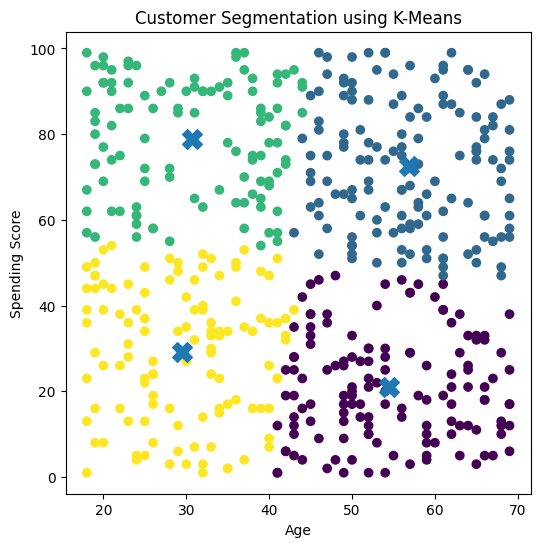

In [6]:
import matplotlib.pyplot as plt

# ---------------- CLUSTER GRAPH ----------------
plt.figure(figsize=(6, 6))

plt.scatter(
    df['age'],
    df['spending_score'],
    c=df['cluster']
)

# Plot centroids
plt.scatter(
    centroids_original[:, 0],
    centroids_original[:, 1],
    marker='X',
    s=200
)

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.show()


In [7]:
from numpy.linalg import norm

# Distance of each point from its cluster centroid
distances = []

for i in range(len(X_scaled)):
    centroid = kmeans.cluster_centers_[df.loc[i, 'cluster']]
    distance = norm(X_scaled[i] - centroid)
    distances.append(distance)

df['distance_from_centroid'] = distances

# Define outliers (top 5% farthest points)
threshold = np.percentile(distances, 95)
df['outlier'] = df['distance_from_centroid'] > threshold


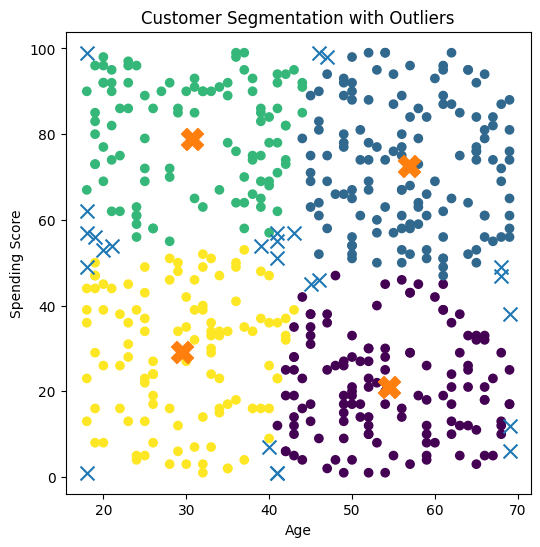

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Normal points
normal = df[df['outlier'] == False]
plt.scatter(
    normal['age'],
    normal['spending_score'],
    c=normal['cluster']
)

# Outliers
outliers = df[df['outlier'] == True]
plt.scatter(
    outliers['age'],
    outliers['spending_score'],
    marker='x',
    s=100
)

# Centroids
plt.scatter(
    centroids_original[:, 0],
    centroids_original[:, 1],
    marker='X',
    s=250
)

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation with Outliers")
plt.show()


[999.9999999999999, 620.380420719247, 380.917665718167, 254.28853638216947, 210.62838984699792, 171.36295611327128, 145.80433713761323, 135.97479678815188, 116.18070318375078, 98.3541509255395]


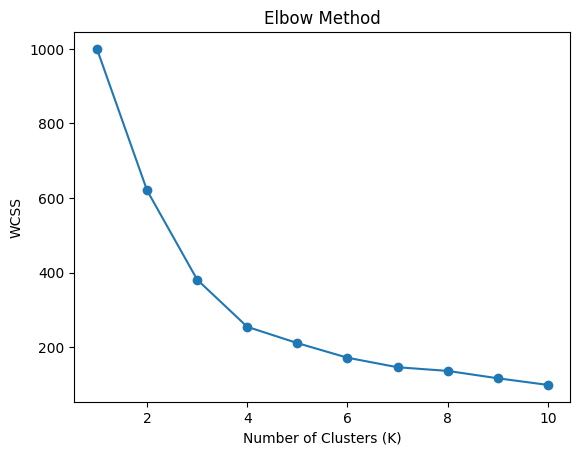

     customer_id  age  spending_score  cluster       cluster_name  \
0              1   56              16        0     Old Low Income   
1              2   69              61        1    Old High Income   
2              3   46              64        1    Old High Income   
3              4   32              63        2  Young High Income   
4              5   60              69        1    Old High Income   
..           ...  ...             ...      ...                ...   
495          496   65              84        1    Old High Income   
496          497   42              25        0     Old Low Income   
497          498   57              68        1    Old High Income   
498          499   62              10        0     Old Low Income   
499          500   18              67        2  Young High Income   

     distance_from_centroid  outlier  
0                  0.198916    False  
1                  0.898960    False  
2                  0.781344    False  
3              

c:\Users\negovin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

df['cluster_name'] = df['cluster'].map(cluster_names)
print(df)

print(df['cluster'].value_counts())

#prediction


new_customer = [[56, 16]] 

new_customer_scaled = scaler.transform(new_customer)

predicted_cluster = kmeans.predict(new_customer_scaled)

print("Predicted cluster:", predicted_cluster)

